In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [2]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [3]:
from patchify import patchify

#### 1. Selecciona una imagen, cárgala en escala de grises dentro del notebook y asígnala a una variable en Python

In [4]:
img_grises = cv.imread('auto.jpg', cv.IMREAD_GRAYSCALE)

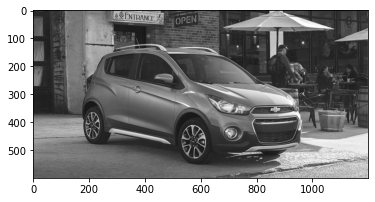

In [5]:
plt.imshow(img_grises, cmap='gray')

#### 2. Divide la imagen en una lista de parches de tamaño 16 x 16 pixeles.

In [6]:
image = np.asarray(img_grises)
patches = patchify(image, (16, 16), step=16)

In [7]:
patches_list = [patches[i][j] for j in range(patches.shape[1]) for i in range(patches.shape[0]) ]

#### 3. Normaliza cada parche para que tengan media en cero, varianza unitaria y muestra 3 imágenes del listado.

In [8]:
# Normalizacion de las imagenes de los parches

patches_norm_list = []

for p_image in patches_list:
  mean = np.mean(p_image)
  std = np.std(p_image)
  n_p_image = np.divide(p_image - mean, std)
  patches_norm_list.append(n_p_image)

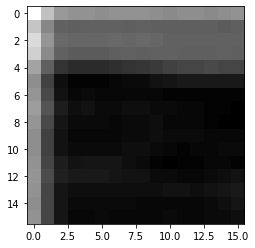

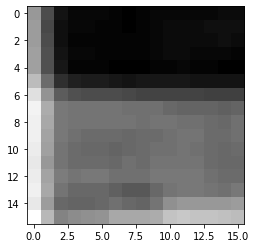

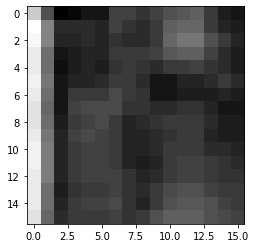

In [9]:
# Mostrar 3 imagenes del listado

for n_p_image in patches_norm_list[:3]:
  plt.imshow(n_p_image, cmap='gray')
  plt.show()

#### 4. Con la imagen del punto 1 aplica un filtro gaussiano con un kernel de 3 x 3 y muestra el resultado.

In [11]:
sigma = np.sqrt(1/(2*np.log(2))) 
img_filtrada = cv.GaussianBlur(img_grises, (3,3), sigmaX=sigma, sigmaY=sigma)

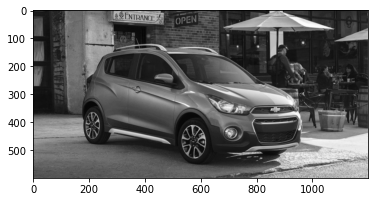

In [13]:
plt.imshow(img_filtrada, cmap='gray')

#### 5. Describe en un párrafo el efecto del filtro gaussiano anterior sobre la imagen
El filtrado gaussiano filtra el ruido que pueda tener la imagen, el filtro tambien hace que la imagen se vea mas borrosa dependiendo del tamaño del kernel y del sigma.

#### 6. Utilizando funciones de SciPy aplica 5 filtros diferentes a la imagen cargada previamente y explica sus efectos.

##### Gaussian Filter
Elimina el ruido de la imagen, la imagen resultante se ve borrosa dependiendo del sigma aplicado.   

In [14]:
from scipy import ndimage

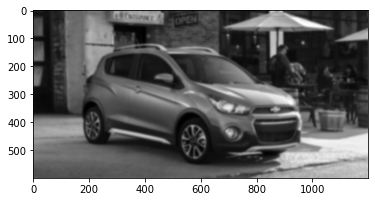

In [15]:
img_res = ndimage.gaussian_filter(img_grises, sigma=3)
plt.imshow(img_res, cmap='gray')

##### Uniform Filter
Convoluciona la imagen con un kernel uniforme, elimina el ruido pero la imagen se ve borrosa

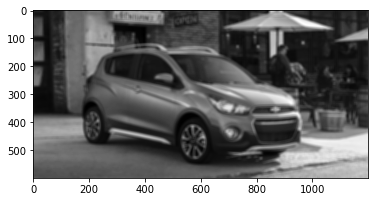

In [16]:
img_res = ndimage.uniform_filter(img_grises, size=11)
plt.imshow(img_res, cmap='gray')

##### Median Filter
Le quita el ruido a la imagen preservando mejor los bordes

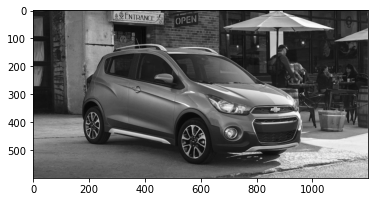

In [17]:
img_res = ndimage.median_filter(img_grises, 3)
plt.imshow(img_res, cmap='gray')

##### Minimum Filter
toma el valor mínimo de una region de pixeles y lo asigna al pixel actual. Esto hace que la imagen tome los valores mas obscuros.

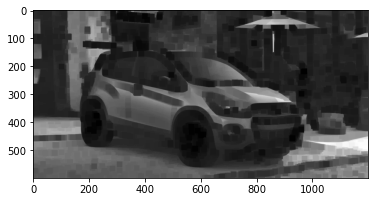

In [18]:
img_res = ndimage.minimum_filter(img_grises, size=20)
plt.imshow(img_res, cmap='gray')

##### Maximum Filter
toma el valor maximo de una region de pixeles y lo asigna al pixel actual. Esto hace que la imagen tome los valores mas claros.

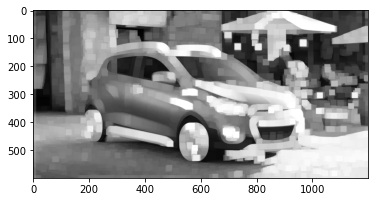

In [19]:
img_res = ndimage.maximum_filter(img_grises, size=20)
plt.imshow(img_res, cmap='gray')

#### 7. Utilizando funciones de SciPy aplica 5 operadores morfológicos a la imagen cargada previamente y explica sus efectos.

##### Erosion
Adelgaza ciertas areas de la imagen para eliminar el ruido. Se eliminan lineas finas quedando solo los objetos claves de la imagen. 

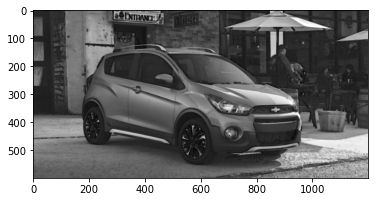

In [20]:
img_res = ndimage.grey_erosion(img_grises, size=(4,4))
plt.imshow(img_res, cmap='gray')

##### Dilation
Expande ciertas regiones de la imagen para eliminar el ruido. Hace que los objetos sean mas visibles, las lineas parecen mas agruesas.

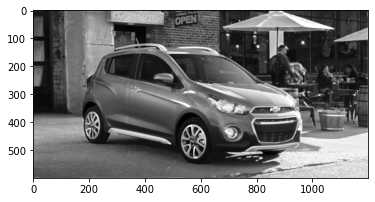

In [21]:
img_res = ndimage.grey_dilation(img_grises, size=(4,4))
plt.imshow(img_res, cmap='gray')

##### Opening
Se aplica primero una erosion y despues una dilatacion para eliminar el ruido

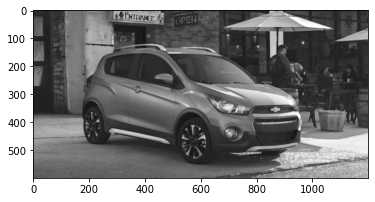

In [22]:
img_res = ndimage.grey_opening(img_grises, size=(4,4))
plt.imshow(img_res, cmap='gray')

##### Closing
Se aplica primero una dilatacion y luego una erosion para eliminar el ruido.

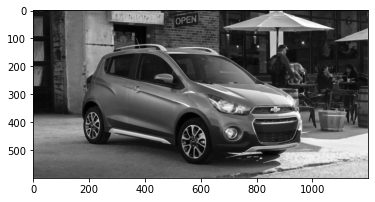

In [23]:
img_res = ndimage.grey_closing(img_grises, size=(4,4))
plt.imshow(img_res, cmap='gray')

##### Morphological Gradient
Permite identificar los contornos en una imagen.

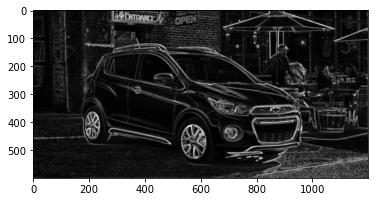

In [24]:
img_res = ndimage.morphological_gradient(img_grises, size=(4,4))
plt.imshow(img_res, cmap='gray')